## <b> Importing libraries:

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as ss
from pandas.plotting import scatter_matrix
import seaborn as sns
import pandas.testing as pdt
import scipy.stats as ss
import numpy.testing as npt
import pandas.testing as pdt
import statsmodels.api as sm
import statsmodels.formula.api as form
from statsmodels.stats import outliers_influence
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
pd.options.mode.chained_assignment = None
sns.set_style("darkgrid")

# <b>Investigating factors determining property value in Mbombela </b>

### Compiled by:
1. Bongumusa Mavuso(1682836)
2. Siyabonga Hlomuka (1384685)
3. Thobelani Makeleni (1199116)

# <b>Executive Summary:</b>

The purpose of this notebook is to present a study that will investigate factors that influence the evaluation of the property value of the properties of the Mbombela Municipality.

The study will model the relationship between each of these different factors and the property value using the dataset from the property evaluation roll which was conducted in 2010 within the area of Mbombela by the Mbombela Municipality.

The main result of this study will be a linear model in this form:
<br>
   \begin{align*}
   y &= \beta_o + \beta_1 * x_1 + \beta_2 * x_2 + ... 
   \end{align*}
<br>
$ where, \ \   x_i  \ \ where \ i\ = \ {{0, 1, ... , n}} \ $  represents the  $ \ x_i \  $  feature which influences the market value (y) of the property and $ \beta_i \  \ where  \  i  \  =  \ {0, 1, 2, .., n } \ $ is the weight of the $ \ x_i \ $  feature. In addition, we will also make use of graphical representations that will show the relationships between the distinct features which have a direct causal influence in determining the market value of the properties and the market value of the properties.

#### <b> Limitations:

We did not get a similar dataset to this one, which was collected before 2010 or after 2010, which we can use to compare this dataset to or use to test our model (test our model on a dataset from a different time period). The dataset was not accompanied by a data description hence we have no rich knowledge about the true meaning of some of the features, how the dataset was collected and how the properties used on the dataset were selected. Furthermore, the dataset is incomplete, since some of the features contained null values for the majority of their values. The data was only collected from Mbombela Mpumalanga, making it difficult for our dataset to represent the entire population of South Africa.

# <b>Introduction:</b>

Every four years, the local municipalities in South Africa conduct a general evaluation roll that determines the municipal values of homes and the property rates that should be paid based on these values and ultimately, the price of the property. The property owners usually have objections to the property values determined by the municipality as these values are usually too low for a property value or too high for the prices that the owners must pay for using the municipality services. The property owners usually do not know how the municipality got to the property prices that come after the evaluation, as with the recent evaluation in where property owners experienced a hike in municipality bills. \[ [Private Property](https://www.privateproperty.co.za/advice/news/articles/property-valuations-shock-what-homeowners-can-do/6230)\]

In this project, we are investigating the factors that contribute to the property evaluation prices using the dataset from Mbombela Municipality Evaluation Roll for 2010. This kind of analysis has not been done before. Useful sites to extend this introduction:
1. [Schindlers](https://www.schindlers.co.za/2017/howdovalrollswork/)

## Question:
 ### What factors determine the property value and to what extent do these factors contribute to the value of the property?
 

 
# <b> Overview of methology:
A brief overview of the methodology is as follows:<br>
<br>
1) Read in data<br>
<br>
2) Data wrangling:<br>
&emsp;&emsp; Removing variables that are irrelevant to our question<br>
&emsp;&emsp; Removing Variables that are missing most of their values<br>
&emsp;&emsp; Recovering some variables values, null values, that can't be recovered<br>
&emsp;&emsp; Cleaning variables<br>
&emsp;&emsp; Changing Variable types<br>

<br>
3) Encode variables:<br>
&emsp;&emsp;        Encoding categorical variables
<br>
<br>
4) Exploratory Analyses:<br>
&emsp;&emsp;        Put Exploratory graphs<br>
&emsp;&emsp;        Calculate statistic figures:<br>
&emsp;&emsp;&emsp;&emsp;                eg. Mean, std, min, max and percentiles


5) Data Splitting

6) Model Fitting

7) Conclusion

# <b> Data Description: </b>

The dataset was obtained from [Open Africa:  Mbombela Municipality Property Valuation 2010 ](https://africaopendata.org/dataset/mbombela-municipality-property-valuation-2010) and downloaded on  18 April 2021. The dataset contains over 57000 data points which have 49 features that describe some of the properties in Mbombela Municipality. 

#### <b> Date collected:
The data was collected in Mbombela Municipal Council, in Mpumalanga, South Africa, in 2010. The last time the data modified was on December 21, 2017, at 1:09 PM (UTC+02:00)
 
#### <b> Dataset before cleaning:
The original dataset consists of 49 columns, 48 showing different factors contributing to the price of a property in Mbombela. The description of these columns is given below:
- Township = The township in Mbombeni.
- Stand No = Stand number is used to identify the property
- Sect Title No = Section Title Number. Sectional Title, as a form of ownership (as per the Sectional Titles Act No.95 of 1986), emerged originally to permit parties to buy a piece or section of a larger property/building/development in a fashion where there ownership (or title) is protected (under Sectional Title law) and where there are clear rules and guidelines on how the overall property is managed, maintained and run. 
- StandDescrip = Stand Description.
- Owner Name = The owner of the property.
- Account No = Account Number. Account Number of the owner.
- Prop Category = Property Category
- TariffCode = Tariff Code.
- Physical Addr = Physical Address Showing the physical location of the property.
- Street No = Street Number. Identifying the street where the property is located
- Size = The size of the property measured in square meters
- Up-Level Size
- MarketValue = The price which the property is valued at. (Our Predictive Variable)
- Exemp Size
- Exemp Value
- Main Roll No = Main Roll Number. A Roll Number tells you everything you need to know about where a property is located. 
- Supp RollNo = Supplimentary roll number. Every property in every municipality should (hypothetically) be on a roll, but because properties are continuously coming into existence and ceasing to exist, new rolls are created (these are referred to as supplementary rolls) to include any properties that have not been previously recorded on another, prior, general roll.
- Owner Type = What type of owner is it (Private, municiplaity, Departmental and General)
- Valuation Date = When was the property evaluated  to put a market value on it.
- Effect Date = The Effective Date for each Property Use Detail is the date that it was first valid for the property.
- Up-LevelInd
- Zone Code = Land zoning is how local governments, such as city councils, restrict the physical development and use of specific parcels of land. 
- Zone Descrip = Zone Description, Expanding on the codes and what it means. The Code descriptions are: 'BUSINESS 2', 'BUSINESS 1', 'PUBLIC GARAGE', 'RESIDENTIAL 4','SPECIAL', 'GOVERNMENT', 'MUNICIPAL', 'EXISTING PUBLIC ROADS', 'RESIDENTIAL 1', 'PUBLIC OPEN SPACE', 'BUSINESS 4', 'RESIDENTIAL 3', 'EDUCATIONAL', 'RESIDENTIAL 2', 'PRIVATE OPEN SPACE', 'INSTITUTIONAL', 'INDUSTRIAL 1', 'CHURCHES', 'INDUSTRIAL 3', 'INDUSTRIAL 2', 'TRANSNET', 'AGRICULTURE', 'BUSINESS 3', 'PARKING', 'CEMETRY', 'RECREATION', 'RAILWAY LINE(TRANSNET)', 'PRIVATE ROAD', 'RESIDENTIAL 5', 'GOVERNMENT & TELKOM', 'COMMERCIAL', 'KANYAMAZANE'
- Usage Code = Usage code is a code that details how the property will be used.
- UsageDescrip = Usage Description, Expanding on the codes and what it means. The Code descriptions are: 'BUSINESS 2', 'BUSINESS 1', 'PUBLIC GARAGE', 'RESIDENTIAL 4', 'SPECIAL', 'GOVERNMENT', 'MUNICIPAL', 'EXISTING PUBLIC ROADS', 'RESIDENTIAL 1', 'PUBLIC OPEN SPACE', 'BUSINESS 4', 'RESIDENTIAL 3', 'EDUCATIONAL', 'RESIDENTIAL BUSINESS', 'RESIDENTIAL 2', 'PRIVATE OPEN SPACE', 'DWELLINGS', 'INSTITUTIONAL', 'INDUSTRIAL 1', 'VACANT LAND SR', 'CHURCHES', 'INDUSTRIAL 3', 'PARKING', 'BED & BREAKFAST', 'INDUSTRIAL 2', 'TRANSNET', 'AGRICULTURE', 'BUSINESS 3', 'CEMETRY', 'RESIDENTIAL GUEST HOUSE', 'RESERVOIR', 'BUSINESS PREMISES', 'ROAD', 'RAILWAY LINE(TRANSNET)', 'AGRICULTURAL', 'PROPOSED NEW ROAD', 'RESIDENTIAL 5', 'VACANT LAND SINGLE RESIDENTIAL', 'POST OFFICE', 'COUNCIL VACANT RES 1 STANDS', 'FARM', 'SHOP', 'GOVERNMENT AND TELKOM', 'FACTORY', 'OFFICE', 'KANYAMASANE', 'SUBSTATION', 'CHURCH', 'VACANT LAND PLACES OF WORSHIP', 'CHRECHE', 'SCHOOL', 'PETROL FILLING STATION', 'CHICKEN HATCHERY', 'COMMUNITY CENTRE', 'ST DWELLING', 'ST RESIDENTIAL'
- Empty Stand Ind = Empty stand index that determines in the stand is empty or not.
- Valuation Type = The type of valuation method they used to value the property.
- SGNumber
- Ward
- Cycle
- Meter Book
- Status = Property status refers to the situation of a property that was for sale or is currently for sale.
- Val Cnt = This value keep record of the number of evaluation that have been performed on the property.
- Postal Addr1 = This is the first line of the address.
- Postal Addr2 = This is the second line of the address.
- Postal Addr3 = This is the third line of the address.
- Postal Addr4 = This is the fourth line of the address.
- Postal Addr5 = This is the fifth  line of the address.
- Postal Code = This 
- BC Create Date
- BC Orig Date
- BC Altern Date
- BC Value
- BC Tariff
- Deed Date = This is the date on which the deep of a property was first obtained.
- Deed No = Deed Number.
- Register Date = Date which the property was registered.
- Register No = Property Registration Number. means the number issued by the City identifying the Application.
- Capture Date = This is the last date the evaluation findings of a proprerty were recorded.



#### <b> Aspects of Data Quality:
- The data was retrieved from openAFRICA, openAFRICA is not a government portal. Instead, it’s a grassroots initiative, maintained by Code for Africa, as a public service.OpenAFRICA has additional support from Amazon Web Services (AWS) and the World Bank, both well known and accredited organisation thus making our source openAFRICA a credible source.

- The data collection was done in 2010 and the evaluations of the properties were done around the same time interval from 2008 to 2010 making our market values comparison fair because the amounts were not affected by other time factors like inflation. 

- The data was collected from the same region (Mbombeni).

- In terms of completeness of data, we have some missing values from some columns, most notably columns BC Tariff, BC Value and SGNumber having no values at all. Columns Sect Title No, Empty Stand Ind, Postal Addr3, Postal Addr4, Postal Addr5, Deed No and StandDescrip have a lot of missing values as well. The rest of the columns are mostly filled with a minimal of missing values.

- The columns are consistent in terms of the data type of each column.

- In terms of Unifromaty, most of the columns have consistent use of units and scales except for the column'Owner Type' as this has some numeric values which are unexplained.

#### <b> Ability to answer question:
Considering our Question 'What factors determine the property value and to what extent do these factors contribute to the value of the property?' our dataset has adequate variables like the size of the property, owners of property etc, to tackle this question. At high sight, after close data analyse, it is clear to see that our variables might not be the best individually to tackle our question as no variable individually has a strong relationship with our predictive variable (market value).

### <b> Reading in data:

In [2]:
# reading in the dataset
data = pd.read_excel('valuation-2010.xls')
print("First five data points of the dataset:")
data.head()

First five data points of the dataset:


,Township,Stand No,Sect Title No,StandDescrip,Owner Name,Account No,Prop Category,TariffCode,Physical Addr,Street No,...,BC Create Date,BC Orig Date,BC Altern Date,BC Value,BC Tariff,Deed Date,Deed No,Register Date,Register No,Capture Date
0,NELSPRUIT TOWN,000000000000010000100000000,NaN,GED 1 ERF 1,NELSPRUIT HARDWARE,2218141.0,BUS,VABUS,PAUL KRUGER STREET,1,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,19810925.0,T46343/81,99999999.0
1,NELSPRUIT TOWN,00000000000001000RE00000000,NaN,RESTANT VAN ERF 1,MINTY IE & SONS PTY LTD,2218119.0,BUS,VABUS,ANDERSON STREET,36,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,19810925.0,T46344/81,99999999.0
2,NELSPRUIT TOWN,000000000000020000000000000,NaN,ERF 2,MINTYS UNIVERSAL STORES LTD,2218130.0,BUS,VABUS,ANDREW STREET,33,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,T96299/200,0.0
3,NELSPRUIT TOWN,000000000000030000000000000,NaN,ERF 3,LOWMIN PROPERTIES (PTY) LTD,2217568.0,BUS,VABUS,ANDERSON STREET,32,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,T96299/200,0.0
4,NELSPRUIT TOWN,000000000000040000000000000,NaN,ERF 4,NELMIN ERF 4 PROPERTIES (PTY) LTD,2040436.0,BUS,VABUS,ANDERSON STREET,30,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,20020814.0,T96299/200,20021029.0


From the above summary, it is clear that each column is a variable and each row represents a new property record that has values from each column. The raw data has some missing values indicated by NaN. Each Column is either an object or float, the float is all the numeric columns, including the date, and the rest are treated as an object. The date will late be changed to the correct type(DateTime)

### <b> Validations:

In [3]:
# getting information about the attributes of the dataset
print("Data types of the attributes of the initial dataset: \n")
data.info()

Data types of the attributes of the initial dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57252 entries, 0 to 57251
Data columns (total 49 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

The output above shows that the dataset contains  57252 points. The dataset has 49 features and all of the features have at least one value. The dataset is 21.4 MB large.

In [4]:
# getting description of the dataset
data.describe()

,Account No,Size,Up-Level Size,MarketValue,Exemp Size,Exemp Value,Main Roll No,Supp RollNo,Valuation Date,Effect Date,...,Val Cnt,Postal Code,BC Create Date,BC Orig Date,BC Altern Date,BC Value,BC Tariff,Deed Date,Register Date,Capture Date
count,5.723900e+04,5.724600e+04,57246.0,5.724600e+04,57246.0,57246.0,57246.0,57246.000000,5.724600e+04,5.724600e+04,...,57246.000000,57227.000000,57227.0,57227.0,57227.0,0.0,0.0,5.722700e+04,5.722700e+04,5.722700e+04
mean,2.632920e+06,4.980989e+04,0.0,6.644221e+05,0.0,0.0,2.0,1.442913,2.009117e+07,2.009117e+07,...,1.000943,1900.546980,0.0,0.0,0.0,NaN,NaN,2.202494e+06,9.767406e+06,2.877971e+07
std,9.302737e+05,8.205704e+05,0.0,3.786126e+06,0.0,0.0,0.0,1.055363,2.034716e+03,2.034717e+03,...,0.040940,2221.613457,0.0,0.0,0.0,NaN,NaN,6.263835e+06,1.001051e+07,4.032805e+07
min,1.000855e+06,0.000000e+00,0.0,0.000000e+00,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,0.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.114612e+06,3.520000e+02,0.0,5.600000e+04,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,1200.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.506226e+06,5.420000e+02,0.0,2.400000e+05,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,1200.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.062104e+06,1.108000e+03,0.0,7.000000e+05,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,1240.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,2.004071e+07,2.009092e+07
max,1.564422e+07,9.327444e+07,0.0,6.600000e+08,0.0,0.0,2.0,6.000000,2.010012e+07,2.010012e+07,...,4.000000,9999.000000,0.0,0.0,0.0,NaN,NaN,2.009082e+07,2.202093e+07,1.000000e+08


From the table above it is clear that this dataset needs to be subjected to some processing (the size of one of the properties for example is zero meters squared according to the above table - that is unrealistic) for us to be able to draw out useful insights from it. In the next section, we process our dataset. We will remove features that we think intuitively can not influence the market value. We will also provide more specific reasons for removing some of these attributes.  We will also encode some of the features' value, we will then account for NaN values or unknown values and lastly, we will deal with inconsistencies like outliers.

# <b> Data Wrangling:

<blockqoute>
In this next cell, we drop several columns of the dataset either because we think they were irrelevant in determining the value of the property, the data had a lot of missing values or the information contained in the column was redundant as it was contained in another column.
</blockqoute>

Based on the data description, info and summary, the following columns will be dropped:

- Postal Addr1, Postal Addr2, Postal Addr3, Postal Addr4 and Postal Addr5. These columns will be represented only by 'Phys Addr' column.

- From the data info output, the columns, 'Stand Descrip','Sect Tittle No', 'Create Date', 'BC Orig Date', 'BC Altern Date', 'BC Value', 'BC Tariff', 'Deed Date', and 'Deed No' contain null values only or very few data points available. Which means there is no way to recover the lost data, as we do not know how the data should look like.</br>

- The columns 'Up-Level Size', 'Examp Size', 'Exemp Value', 'BC Create Date', 'BC Orig Date', and 'BC Altern Date' as they have a mean of zero, which means they do not have any contribution to the price of the MarketValue.

- The following columns were removed in fovor of one column that showed similar results(remaining - removed):
    - 'Prop Category' - 'Owner Type', 'Tarrif Code'
    - Index - 'Street No'

In [5]:
#Columns to be removed
data_new = data.drop(columns = ['Stand No', 'StandDescrip','Sect Title No', 'Account No', 'TariffCode',
       'Street No', 'Up-Level Size','Exemp Size',
       'Exemp Value', 'Main Roll No', 'Owner Type',
       'Valuation Date', 'Up-LevelInd','BC Create Date',
       'BC Orig Date', 'BC Altern Date', 'BC Value','BC Tariff',
       'Zone Descrip', 'UsageDescrip','SGNumber','Status',
       'Postal Addr1', 'Postal Addr2', 'Postal Addr3',
       'Postal Addr4', 'Postal Addr5', 'Postal Code',
       'Deed Date', 'Deed No', 'Register Date', 'Register No'])
data_new = data_new.drop(columns = [data_new.columns[-1]])

#Number of columns in the oriiginal data set
num_cols_orig = len(data.columns)
new_num_cols = len(data_new.columns)
left_cols= num_cols_orig - new_num_cols
#Capute date is not properly named, so we must remove it using the indexs
print('After cleaning our data, we were able to remove', str(left_cols) + " features", 'and we were left with', str(new_num_cols) + " features")
print('\n''This is our dataset after perfoming the above operations:')
data_new.head(3)

After cleaning our data, we were able to remove 33 features and we were left with 16 features

This is our dataset after perfoming the above operations:


,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Empty Stand Ind,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,BUS,PAUL KRUGER STREET,862.0,2900000.0,4.0,20090805.0,BUS2,BUS2,N,VI,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,BUS,ANDERSON STREET,625.0,1700000.0,1.0,20090701.0,BUS2,BUS2,NaN,VG,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,BUS,ANDREW STREET,1487.0,6200000.0,4.0,20090805.0,BUS2,BUS2,NaN,VI,14.0,3.0,MB0201,1.0


<br>

Now that we have removed all the 'dirty' columns, we will continue to clean the remaining dataset by cleaning the 'Nan' values by either trying to recover the lost data using the currently existing data points or removing the data points with 'Nan' value if they are unrecoverable. We will process the remaining dataset in portion to avoid errors and make it easy to manage and trace mistakes in the data. Beginning to process the dataset from columns starting with column = 'Township' to column = 'MarketValue'.

<br>

### <b> Processing the data from column = 'Township' to column = 'MarketValue':

In [6]:
# creating a new dataframe df
df = pd.DataFrame()
# copying the contents of data_new to this dataframe df
df = data_new.copy()
print("The data before processing of columns, from column = 'Township' to column = 'MarketValue':")
df.iloc[:,0:6].head()

The data before processing of columns, from column = 'Township' to column = 'MarketValue':


,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,BUS,PAUL KRUGER STREET,862.0,2900000.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,BUS,ANDERSON STREET,625.0,1700000.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,BUS,ANDREW STREET,1487.0,6200000.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,BUS,ANDERSON STREET,1487.0,7300000.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,BUS,ANDERSON STREET,1487.0,4500000.0


In [7]:
print('The null values of the columns, from column = Township to column = MarketValue:\n')
print('Township contains ', df['Township'].isnull().sum(), 'null values.')          
print('Owner Name column contains', df['Owner Name'].isnull().sum(), 'null values.')
print('Prop Category contains', df['Prop Category'].isnull().sum(), 'null values.') 
print('Physical Addr contains', df['Physical Addr'].isnull().sum(), 'null values.') 
print('Size column contains', df['Size'].isnull().sum(), 'null values.')            
print('MarketValue contains', df['MarketValue'].isnull().sum(), 'null values.')  

The null values of the columns, from column = Township to column = MarketValue:

Township contains  0 null values.
Owner Name column contains 13 null values.
Prop Category contains 6 null values.
Physical Addr contains 285 null values.
Size column contains 6 null values.
MarketValue contains 6 null values.


We will start with the columns that contain the least number of null/Nan. 

We will start with the 'Prop Category' column, and encode the different attributes using integers, we will encode the 'Nan' in the Owners column with "Other" to represent the owners we do not have details for.

We will then, fill the 'Nan' values in the columns 'Owner Name' and 'Physical Addr' with the word 'Other' and 'Unknown' respectively as they are no means we can use to recover the unknown values of these attributes.

In [8]:
#encode prop category
#1 BUS and #2 RES #3 GOV #4 MUN #5 POW #6 OTH #7 PSI #8 AG #9 RUR
df['Prop Category'] = np.where(df['Prop Category'] == 'BUS', 1 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'RES', 2 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'GOV', 3 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'MUN', 4 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'POW', 5 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'OTH', 6 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'PSI', 7 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'AG',  8 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'RUR', 9 ,df['Prop Category'])

In [9]:
#encode missing owners name with 'other'
df['Owner Name'] = df['Owner Name'].fillna('Other')
#encode missing values for physical address
df['Physical Addr'] = df['Physical Addr'].fillna('Unknown')

In [10]:
# encoding the Physical Addresses 
physical_addr = df['Physical Addr'].tolist()
streets  = []
street_num  = 1
for i, street in enumerate(physical_addr):
    if street not in streets:
        streets.append(street)
        physical_addr[i] = streets.index(street) + 1
    else:
        physical_addr[i] = streets.index(street) + 1
df['Physical Addr'] = physical_addr

In [11]:
df.iloc[:, 0:6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57252 entries, 0 to 57251
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Township       57252 non-null  object 
 1   Owner Name     57252 non-null  object 
 2   Prop Category  57246 non-null  object 
 3   Physical Addr  57252 non-null  int64  
 4   Size           57246 non-null  float64
 5   MarketValue    57246 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.6+ MB


The above output we used it to validate the data types of the features we processed in this section which range from Township to Market Value.

In [12]:
print("This is the data after processing the columns - from column = 'Township' to column = 'MarketValue':")
##Store this new cleaned to df_clean
df_clean = df.copy()
df.iloc[:,0:6].head()

This is the data after processing the columns - from column = 'Township' to column = 'MarketValue':


,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,1,1,862.0,2900000.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,1,2,625.0,1700000.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,1,3,1487.0,6200000.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,1,2,1487.0,7300000.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,1,2,1487.0,4500000.0


Now that we have processed the data from column = 'Township' to column = 'MarketValue' we turn our focus to the columns of the dataset starting from column = 'Supp RollNo' to column = 'Valuation Type':

### <b> Processing the data from column = 'Supp RollNo' to column = 'Valuation Type':

In [13]:
#Data wrangling of dataset from Column 7 to Coulumn 13
print("The data before processing of columns, from column = 'Supp RollNo' to column = 'Valuation Type':")
data_section = df_clean.iloc[:,6:12]
data_section.head()

The data before processing of columns, from column = 'Supp RollNo' to column = 'Valuation Type':


,Supp RollNo,Effect Date,Zone Code,Usage Code,Empty Stand Ind,Valuation Type
0,4.0,20090805.0,BUS2,BUS2,N,VI
1,1.0,20090701.0,BUS2,BUS2,NaN,VG
2,4.0,20090805.0,BUS2,BUS2,NaN,VI
3,4.0,20090805.0,BUS2,BUS2,NaN,VI
4,6.0,20100125.0,BUS2,BUS2,N,VI


Noting that there is only N and Nan values in the 'Empty Stand Ind' column, we could have decided that the 'Nan' represented as YES but, that assumption was far fetched as we cannot conclude that the stand is empty or not since there may be other factors affecting this variable, as a result, we will drop this column below.

In [14]:
#There is only N and null values in 'Empty Stand Ind'. The question is 'is null equal to yes?', this assumption is far fetched thus might be incorrect, based on that we take out this column
##For debugging purposes
try:
    df_clean = df_clean.drop(columns = 'Empty Stand Ind')
except:
    print('The column Empty Stand Ind has been removed already')
print("Data section startting from column = 'Supp RollNo' to column = 'Valuation Type': after removal of Empty Stand Ind:")
data_section = df_clean.iloc[:,6:12]
data_section.head()

Data section startting from column = 'Supp RollNo' to column = 'Valuation Type': after removal of Empty Stand Ind:


,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward
0,4.0,20090805.0,BUS2,BUS2,VI,14.0
1,1.0,20090701.0,BUS2,BUS2,VG,14.0
2,4.0,20090805.0,BUS2,BUS2,VI,14.0
3,4.0,20090805.0,BUS2,BUS2,VI,14.0
4,6.0,20100125.0,BUS2,BUS2,VI,14.0


In [15]:
print("The values below relate to columns starting with column = 'Supp RollNo' to column = 'Valuation Type' of the dataset.")
print("This is the number of columns with missing values:", end = " ")
#Checking columns with null values
ncols_missing = data_section.isnull().any(axis=0).sum()
print(ncols_missing)
print('This is the number of rows with missing values:', end = " ")
#Checking rows with null values
nrows_missing = data_section.isnull().any(axis=1).sum()
print(nrows_missing)

The values below relate to columns starting with column = 'Supp RollNo' to column = 'Valuation Type' of the dataset.
This is the number of columns with missing values: 6
This is the number of rows with missing values: 6


These values indicates that the are cells in these columns that have missing values. There are several reasons for which these values could be missing, which are not known to us at the moment.

In [16]:
#All 6 columns have missing values
#6 rows have missing values
#For seing which rows index are null in respect to each column.
print(np.where(data_section['Supp RollNo'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Supp RollNo")
print(np.where(data_section['Effect Date'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Effect Date")
print(np.where(data_section['Zone Code'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Zone Code")
print(np.where(data_section['Usage Code'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Usage Code")
print(np.where(data_section['Valuation Type'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Valuation Type")
print(np.where(data_section['Ward'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Ward")

[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Supp RollNo
[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Effect Date
[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Zone Code
[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Usage Code
[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Valuation Type
[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Ward


The output above shows the rows that contain null values for different features as shown above. We are then going to process our dataset by removing data points since most of the information relating to these properties is missing, so not much information can be extracted from these properties.

In [17]:
#All the rows with missing values are removed
df_clean = df_clean.drop([30400, 40754, 40767, 40800, 40815, 40834]);

In [18]:
print('This is the number of columns with missing values:', end = " ")
data_section = df_clean.iloc[:,7:12]
#Checking columns with null values
ncols_missing = data_section.isnull().any(axis=0).sum()
print(ncols_missing)
print('This is the number of rows with the missing values:', end = " ")
#Checking rows with null values
nrows_missing = data_section.isnull().any(axis=1).sum()
print(nrows_missing)



This is the number of columns with missing values: 0
This is the number of rows with the missing values: 0


The values below relate to columns starting with column = 'Supp RollNo' to column = 'Valuation Type' of the dataset,
after removing the null values mentioned above. We are now ready to encode some these attributes. In the next few cells we encode the 'Zone Code' , 'Usage Code' and 'Valuation Type' using different encoding schemes that we found to be appropriate for each attribute. 

In [19]:
#Making my dictionaries
dic = pd.Series(data_section['Zone Code'].unique())
dic.index = dic.index + 1
dic = pd.Series(dic.index.values, index = dic)

dic2 = pd.Series(data_section['Usage Code'].unique())
dic2.index = dic2.index + 1
dic2 = pd.Series(dic2.index.values, index = dic2)

dic3 = pd.Series(data_section['Valuation Type'].unique())
dic3.index = dic3.index + 1
dic3 = pd.Series(dic3.index.values, index = dic3)

In [20]:
#Encoding based on the dictionaries
lookup_table = dict(dic)

def lookup_customer(val):
    return lookup_table.get(val, np.nan)


data_section['Zone Code'] = data_section['Zone Code'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic2)
data_section['Usage Code'] = data_section['Usage Code'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic3)
data_section['Valuation Type'] = data_section['Valuation Type'].apply(lambda x: lookup_customer(x));
print("The data after encoding  Zone Code, Usage Code and Valuation Type:")
data_section.head()
#df_new.head(20)

The data after encoding  Zone Code, Usage Code and Valuation Type:


,Effect Date,Zone Code,Usage Code,Valuation Type,Ward
0,20090805.0,1,1,1,14.0
1,20090701.0,1,1,2,14.0
2,20090805.0,1,1,1,14.0
3,20090805.0,1,1,1,14.0
4,20100125.0,1,1,1,14.0


In [21]:
###Supp RollNo is Supplimentary roll number
##Every property in every municipality should (hypothetically) be on a roll, but because properties are continuously coming into existence and ceasing to exist, new rolls are created (these are referred to as supplementary rolls) to include any properties that have not been previously recorded on another, prior, general roll.
data_section.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57246 entries, 0 to 57251
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Effect Date     57246 non-null  float64
 1   Zone Code       57246 non-null  int64  
 2   Usage Code      57246 non-null  int64  
 3   Valuation Type  57246 non-null  int64  
 4   Ward            57246 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 2.6 MB


The above output we used it to validate the data types of the features we processed in this section which range from Effect Date  to Ward. We saw it was necessary to convert the our Effect Date from float to datetime as this is the most appropriate data type to store a date. 

In [22]:
#convert column Effect date to date time
data_section['Effect Date'] = pd.to_datetime(data_section['Effect Date'], format='%Y%m%d') 
data_section.head()

,Effect Date,Zone Code,Usage Code,Valuation Type,Ward
0,2009-08-05,1,1,1,14.0
1,2009-07-01,1,1,2,14.0
2,2009-08-05,1,1,1,14.0
3,2009-08-05,1,1,1,14.0
4,2010-01-25,1,1,1,14.0


In [23]:
print('The final cleaned dataframe after processing columns starting from Supp RollNo to Ward:')
df_clean.iloc[:,7:12] = data_section
df_clean.head()

The final cleaned dataframe after processing columns starting from Supp RollNo to Ward:


,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,1,1,862.0,2900000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,1,2,625.0,1700000.0,1.0,2009-07-01,1,1,2,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,1,3,1487.0,6200000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,1,2,1487.0,7300000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0005,1.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,1,2,1487.0,4500000.0,6.0,2010-01-25,1,1,1,14.0,3.0,MB0005,1.0


Now that we have processed columns from Township to Ward of the dataset. We now turn our focus to the remaining section of the dataset. These includes features from Cycle to Val Cnt. 

In [24]:
print("State of data before processing columns from Cycle to Val Cnt:")
df_clean.iloc[:, 12:].head()

State of data before processing columns from Cycle to Val Cnt:


,Cycle,Meter Book,Val Cnt
0,3.0,MB0201,1.0
1,3.0,MB0005,1.0
2,3.0,MB0201,1.0
3,3.0,MB0005,1.0
4,3.0,MB0005,1.0


From the table above it is clear that only meter book seem to need further processing since we need to encode this variable. In the next cell we remove all the meter book values with null values.

In [25]:
##Cleaning the meter book column
#Getting the unique element
#Removing the rows where meter book is Nan
df_clean = df_clean[df_clean['Meter Book'].notna()]

meter_list = list(set(df_clean['Meter Book']))

Since all null values for meter book, we are ready to encode this variable. In the next few cells we encode this feature.

In [26]:
#encoding meter book
meter_dic = {}
for i in meter_list:
    if type(i) is not int:
            meter_dic[i] = i

In [27]:
#Checks if the key is in the dictionary
def check_key(dic, key):
    if key in dic.keys():
        return True
    return False

#Used to discard all the meters that do not have values in them
def check_num(meter):
    return any(char.isdigit() for char in meter)

def cleanup_meter(meter):
    meter = str(meter)
    if check_num(meter) is False:
        return float('Nan')
    if check_key(meter_dic, meter):
        return meter
    #if it is not there we will encode it, else it is not available
    if check_num(meter):
#        meter = int(meter)
        l =4 - len(str(meter))  #Getting the number of values to add after the
        s = 'MB' + meter.zfill(l)
        return s

In [28]:
##Apply the cleanup function to the meter book column
df_clean['Meter Book'] = df_clean['Meter Book'].apply(cleanup_meter)
##Remove the Nan rows as they are the uncleanable data points
df_clean = df_clean[df_clean['Meter Book'].notna()]

In [29]:
##Updated clean dataframe
df_clean.head(5)

,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,1,1,862.0,2900000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,1,2,625.0,1700000.0,1.0,2009-07-01,1,1,2,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,1,3,1487.0,6200000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,1,2,1487.0,7300000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0005,1.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,1,2,1487.0,4500000.0,6.0,2010-01-25,1,1,1,14.0,3.0,MB0005,1.0


#### <b> Summary:
In this section we removed the features that we had no intuitive reason for believing that they influenced the market value, the features had a lot of missing value or  the features were redundant since their information was already captured by another features. We then proceeded and encoded some of the attributes' values using different encoding schemes.In the next section we explore the dataset using several statistics. We hope to gain more insights about the datase by identifying relationships between features, identifying outliers and identify inconsistencies. We will use these insights to modify the dataset accordingly. 

# Exploratory Data Analysis:

### Summary statistics before removal of outliers:

In [30]:
df_clean.describe()

,Physical Addr,Size,MarketValue,Supp RollNo,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Val Cnt
count,52400.000000,5.240000e+04,5.240000e+04,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000
mean,707.898531,5.402959e+04,6.938966e+05,1.425305,10.506336,12.137309,1.803359,21.854733,20.009618,1.000992
std,362.003269,8.571324e+05,3.874091e+06,1.020502,4.305066,6.932033,0.397463,44.594991,16.919328,0.042343
min,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,462.000000,3.380000e+02,5.800000e+04,1.000000,9.000000,9.000000,2.000000,15.000000,1.000000,1.000000
50%,673.000000,5.400000e+02,3.000000e+05,1.000000,9.000000,9.000000,2.000000,18.000000,20.000000,1.000000
75%,1062.000000,1.092000e+03,7.400000e+05,1.000000,9.000000,15.000000,2.000000,28.000000,40.000000,1.000000
max,1139.000000,9.327444e+07,6.600000e+08,6.000000,33.000000,55.000000,2.000000,999.000000,60.000000,4.000000


Based on the table above there is at least one property with a market value of R0 and there is at least one property with a 0 squared meter size. These values are unrealistic, therefore these must be outliers. The maximum value of the properties is R 660 000 000. At most 75% of the properties are valued below R 740 000. The maximum size of the properties is 93274400 square meters. The properties have been evaluated at least once and there is at least one property that has been evaluated 4 times.

### Displaying the data types of the remaining features:

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52400 entries, 0 to 57251
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Township        52400 non-null  object        
 1   Owner Name      52400 non-null  object        
 2   Prop Category   52400 non-null  object        
 3   Physical Addr   52400 non-null  int64         
 4   Size            52400 non-null  float64       
 5   MarketValue     52400 non-null  float64       
 6   Supp RollNo     52400 non-null  float64       
 7   Effect Date     52400 non-null  datetime64[ns]
 8   Zone Code       52400 non-null  int64         
 9   Usage Code      52400 non-null  int64         
 10  Valuation Type  52400 non-null  int64         
 11  Ward            52400 non-null  float64       
 12  Cycle           52400 non-null  float64       
 13  Meter Book      52400 non-null  object        
 14  Val Cnt         52400 non-null  float64       
dtypes:

The data has the following data types: object, integers, datetime, and float.
No feature has a null value.

### Data Shape:

In [32]:
df_clean.shape

(52400, 15)

Before the removal of the outliers, the dataset has 52400 observations and 15 features.

### Target Variable details:

In [33]:
market_value_unique_values = df_clean.MarketValue.unique()
market_value_min = df_clean.MarketValue.min()
market_value_max = df_clean.MarketValue.max()
print('The minimum market value is R' , market_value_min)
print('The maximum market value is R' , market_value_max)


The minimum market value is R 0.0
The maximum market value is R 660000000.0


The market value which is the target variable of the study is a continuous variable. The values of the target variable range from R 0.00 to R 660000000.00.

In [34]:
# getting the distribution of the market values
df_clean.MarketValue.value_counts()

20000.0       1746
40000.0       1280
1.0           1106
25000.0        883
15000.0        882
              ... 
813000.0         1
4720000.0        1
10100000.0       1
964000.0         1
1304550.0        1
Name: MarketValue, Length: 1264, dtype: int64

We showed the count of each unique value taken by the target variable. R40000 had the most value count followed by R1100000, R1200000, R110000 and R120000.

### Plotting Box Plot to identify outliers in the dataset:
Only size, market value and evaluation count features were plotted, the remaining features were ignored since they are categorical.

<AxesSubplot:xlabel='MarketValue'>

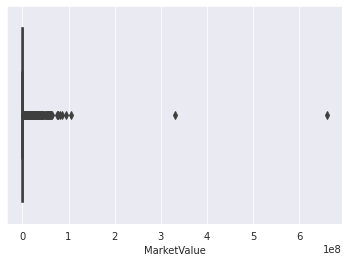

In [35]:
sns.boxplot(x = df_clean['MarketValue'])

### Identifying outliers and removing:
We removed all properties with a market value of $1.6 \times 10 ^6$m as they were outliers in our dataset. We also removed all properties with a size less than  or equal to 73 squared meters since they were too small compared to the sizes of the other properties in the study and they were also far from the average property size in South Africa, standing at 146 $m^2$

The box plot after removing outliers


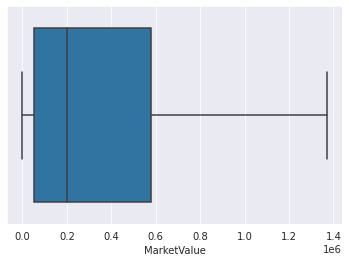

In [36]:
tmp = df_clean[df_clean.MarketValue <1.38e6]
print('The box plot after removing outliers')
sns.boxplot(x = tmp.MarketValue)
df_clean = tmp
df_clean = df_clean[df_clean['Size'] > 73]

### Summary statistics after removal of outliers:

In [37]:
df_clean.describe()

,Physical Addr,Size,MarketValue,Supp RollNo,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Val Cnt
count,44818.000000,4.481800e+04,4.481800e+04,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000
mean,748.888148,2.476271e+04,3.465684e+05,1.364630,10.210072,11.871168,1.822147,22.005600,20.264537,1.000982
std,347.143116,4.200803e+05,3.556825e+05,0.946044,3.728459,6.571180,0.382393,44.652744,16.367198,0.042238
min,1.000000,7.400000e+01,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,514.000000,3.510000e+02,5.200000e+04,1.000000,9.000000,9.000000,2.000000,15.000000,1.000000,1.000000
50%,698.000000,5.060000e+02,1.900000e+05,1.000000,9.000000,9.000000,2.000000,18.000000,20.000000,1.000000
75%,1062.000000,9.180000e+02,5.810000e+05,1.000000,9.000000,12.000000,2.000000,28.000000,30.000000,1.000000
max,1139.000000,4.982675e+07,1.370000e+06,6.000000,33.000000,55.000000,2.000000,999.000000,60.000000,4.000000


### Correlation Plots

Making our predictive variable the first variable. Thus the first column in the table makes it the focal point.

In [38]:
df_clean = df_clean[['MarketValue'] + [col for col in df_clean.columns if col != 'MarketValue']]
df_clean.head(2)

,MarketValue,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
8,1300000.0,NELSPRUIT TOWN,MINTY'S FURNITURE' CC,1,3,1487.0,1.0,2009-07-01,2,2,2,14.0,3.0,MB0008,1.0
9,390000.0,NELSPRUIT TOWN,JABULA TRUST,1,3,518.0,1.0,2009-07-01,2,2,2,14.0,3.0,MB0201,1.0


Encoding the rest of the categorical variables to see how they correlate with the other variables and most importantly the market value variable.

In [39]:
df_copy2 = df_clean.copy()

dic = pd.Series(df_copy2['Township'].unique())
dic.index = dic.index + 1
dic = pd.Series(dic.index.values, index = dic)

dic2 = pd.Series(df_copy2['Owner Name'].unique())
dic2.index = dic2.index + 1
dic2 = pd.Series(dic2.index.values, index = dic2)

dic3 = pd.Series(df_copy2['Meter Book'].unique())
dic3.index = dic3.index + 1
dic3 = pd.Series(dic3.index.values, index = dic3)

dic4 = pd.Series(df_copy2['Effect Date'].unique())
dic4.index = dic4.index + 1
dic4 = pd.Series(dic4.index.values, index = dic4)

lookup_table = dict(dic)

def lookup_customer(val):
    return lookup_table.get(val, np.nan)


df_copy2['Township'] = df_copy2['Township'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic2)
df_copy2['Owner Name'] = df_copy2['Owner Name'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic3)
df_copy2['Meter Book'] = df_copy2['Meter Book'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic4)
df_copy2['Effect Date'] = df_copy2['Effect Date'].apply(lambda x: lookup_customer(x));


df_copy2.head()

,MarketValue,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
8,1300000.0,1,1,1,3,1487.0,1.0,1,2,2,2,14.0,3.0,1,1.0
9,390000.0,1,2,1,3,518.0,1.0,1,2,2,2,14.0,3.0,2,1.0
12,400000.0,1,3,1,4,357.0,4.0,2,2,2,1,14.0,3.0,2,1.0
18,830000.0,1,4,1,1,496.0,1.0,1,1,1,2,14.0,3.0,3,1.0
27,980000.0,1,5,1,4,744.0,1.0,1,2,2,2,14.0,3.0,2,1.0


In [40]:
df_copy2 = df_copy2.astype('float64')
corr = df_copy2.corr()
corr

,MarketValue,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
MarketValue,1.000000,-0.236289,-0.038204,-0.097041,-0.475548,-0.014385,0.220281,0.180558,0.100358,-0.078660,-0.226426,-0.055619,-0.239560,-0.462026,-0.001720
Township,-0.236289,1.000000,0.636633,-0.139393,0.679673,-0.026383,-0.133049,-0.136060,-0.105634,0.069249,0.158095,0.029962,0.258242,0.664686,-0.014081
Owner Name,-0.038204,0.636633,1.000000,-0.116299,0.358619,-0.009758,-0.037078,-0.041907,-0.014365,-0.206690,0.047741,-0.039621,0.184250,0.364966,-0.014341
Prop Category,-0.097041,-0.139393,-0.116299,1.000000,-0.149659,0.196680,0.010235,-0.039495,0.648599,0.550533,0.028429,0.007853,0.235687,-0.108144,0.002195
Physical Addr,-0.475548,0.679673,0.358619,-0.149659,1.000000,-0.041362,-0.249115,-0.214608,-0.162744,0.068407,0.256619,0.065257,0.322087,0.841577,-0.017258
Size,-0.014385,-0.026383,-0.009758,0.196680,-0.041362,1.000000,0.000965,-0.008646,0.173614,0.125572,0.003549,-0.006628,0.056357,-0.029459,0.000345
Supp RollNo,0.220281,-0.133049,-0.037078,0.010235,-0.249115,0.000965,1.000000,0.652136,0.089472,0.003924,-0.828687,-0.022300,-0.134164,-0.255051,0.053023
Effect Date,0.180558,-0.136060,-0.041907,-0.039495,-0.214608,-0.008646,0.652136,1.000000,0.044367,-0.033817,-0.936832,-0.017427,-0.195460,-0.248871,0.039774
Zone Code,0.100358,-0.105634,-0.014365,0.648599,-0.162744,0.173614,0.089472,0.044367,1.000000,0.674279,-0.068337,-0.007402,0.147546,-0.176316,-0.013353
Usage Code,-0.078660,0.069249,-0.206690,0.550533,0.068407,0.125572,0.003924,-0.033817,0.674279,1.000000,0.027830,0.146784,0.105568,0.092284,-0.011201


#### Heat map

<AxesSubplot:>

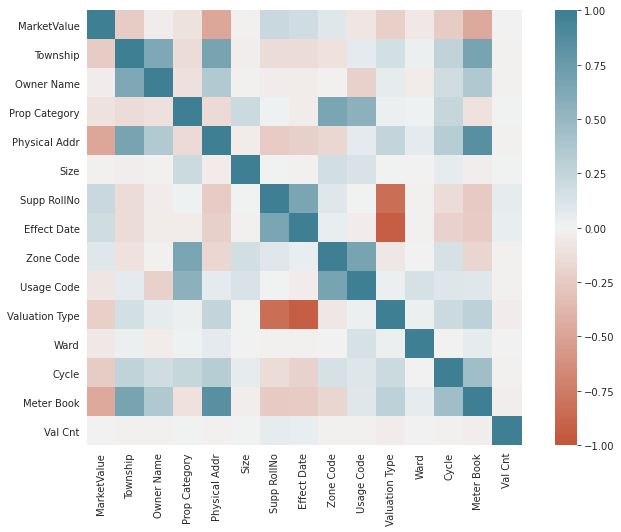

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, ax=ax)


#### Scatter plots

Jitter encoded varaibles for better data visualization

In [42]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [43]:
df_copy2['Physical Addr'] = Jitter(df_copy2['Physical Addr'])
df_copy2['Valuation Type'] = Jitter(df_copy2['Valuation Type'])
df_copy2['Usage Code'] = Jitter(df_copy2['Usage Code'])
df_copy2['Township'] = Jitter(df_copy2['Township'])
df_copy2['Owner Name'] = Jitter(df_copy2['Owner Name'])
df_copy2['Effect Date'] = Jitter(df_copy2['Effect Date'])
df_copy2['Meter Book'] = Jitter(df_copy2['Meter Book'])

In [44]:
plt.figure(figsize=(1200, 1200))
mat_plot = sns.pairplot(df_copy2,diag_kind="hist",palette='Dark2',corner=True, height = 2)
plt.show()

KeyboardInterrupt: 

<Figure size 86400x86400 with 0 Axes>

Error in callback <function flush_figures at 0x7f6c23640790> (for post_execute):


KeyboardInterrupt: 

From the correlation plots it is clear to see that our predictive variable(Market Value) has very little to non correlation with our deterministic variables. The variable that has the highest correlation with marketvalue is size.

# Data Splitting

In [45]:
#Split the data into Train, and Test
df = df_copy2.copy()
df.head()
X = df.loc[:, df.columns != 'MarketValue']
y = df.loc[:, 'MarketValue']

#Split the data into Train, and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
##Add constant(or bias) to the dataset
X_train = sm.add_constant(X_train)

In [46]:
print('Size of the training data is: ', len(y_train))
print('Size of the test data is:', len(y_test))

Size of the training data is:  30028
Size of the test data is: 14790


<blockqoute>In the next few sections we are going to try and fit a linear regression model that will capture the relationship between the marketValue and Township, Owner Name, Prop Category,Physical Addr, Size, Supp RollNo, Effect Date, Zone Code, Usage Code, Valuation Type, Ward, Cycle, Meter Book and Val Cnt.
We expect our linear regresion model to take this form : $$ Y= B_{1}x_{1} +B_{2}x_{2}+ ... $$ where $B_{i}\  $ for  i = {1,2,3, ...} are the weights associated with the respective regressors and Y is our target variable, the market value. 
</blockqoute>
### <b> Hypothesis one:
        
\begin{align}
\textit{Null Hypothesis : } H_{0}: B_{1} &= B_{2} = ... = B_{n} = 0\\
\textit{Alternate  Hypothesis : } H_{1}:  &  \ B_{i} \neq \ 0  for  \ at \ least \ one \ i.
\end{align}
    
The null  hypothesis above states that there is no factor that influences the market value. Whereas, alternative hypothesis states that at least one factor influences the market value.
<b>
### <b> Hypothesis two:
$ \mu_{1} \ represents \ the \ average \ market \ value \ of \ residential \ properties \ and  \ \mu_{2} 
and \ represents \ the  \ average \ market \\ value \ of \ business \ properties.$
    
\begin{align}
\textit{Null Hypothesis : } H_{0}: \mu_{1} &= \mu_{2} \\
\textit{Alternate  Hypothesis : } H_{1}:  \ &  \mu_{1} \neq \mu_{2}.
\end{align}
    
The null hypothesis above states that there is no difference between the average market value of business properties and the average value of residential properties.



# <b> Models

In this section, we fit our model using linear regression, and analyising the perfomance. The model fitting will be based on R-squared. Since we want to know how much our independent variables influence our dependet (Market Value), the R-squared measure is perfect for our modelling.

**Below is the initial models**

In [47]:
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            MarketValue   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     993.5
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:27:15   Log-Likelihood:            -4.2049e+05
No. Observations:               30028   AIC:                         8.410e+05
Df Residuals:                   30013   BIC:                         8.411e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7.234e+05   4.24e+04     17.

From the above model, we have an R-squred value at  of $\approx 0.3$. The model also has multicollinearity between some of the variables, hence it produced high condition number.

Fixing the data to have a polynomial linear regression of degree 2

In [48]:
X_trained_square = X_train.loc[:,X_train.columns !='const'] * X_train.loc[:,X_train.columns !='const']
X_trained_square = X_trained_square.rename(columns = {'Township': 'Township_sqr', 'Owner Name': 'Owner Name_sqr', 'Prop Category': 'Prop Category_sqr', 'Physical Addr': 'Physical Addr_sqr', 'Size':'Size_sqr', 'Supp RollNo':'Supp RollNo_sqr','Effect Date':'Effect Date_sqr', 'Zone Code':'Zone Code_sqr', 'Usage Code':'Usage Code_sqr','Valuation Type':'Valuation Type_sqr', 'Ward':'Ward_sqr', 'Cycle':'Cycle_sqr', 'Meter Book':'Meter Book_sqr', 'Val Cnt':'Val Cnt_sqr'}, inplace = False)
X_trained_square.head(2)

,Township_sqr,Owner Name_sqr,Prop Category_sqr,Physical Addr_sqr,Size_sqr,Supp RollNo_sqr,Effect Date_sqr,Zone Code_sqr,Usage Code_sqr,Valuation Type_sqr,Ward_sqr,Cycle_sqr,Meter Book_sqr,Val Cnt_sqr
6673,1356.319727,9.951732e+06,4.0,120464.320702,2669956.0,1.0,1.796710,81.0,68.992157,4.913884,225.0,1.0,5777.358988,1.0
12858,6733.526651,5.865850e+07,4.0,369610.575485,254016.0,4.0,14.930716,81.0,70.180404,0.017102,289.0,1.0,1391.505380,1.0


Fixing the data to have a polynomial linear regression of degree 3

In [49]:
X_trained_cube = X_train.loc[:,X_train.columns !='const'] * X_train.loc[:,X_train.columns !='const'] * X_train.loc[:,X_train.columns !='const']
X_trained_cube = X_trained_cube.rename(columns = {'Township': 'Township_cb', 'Owner Name': 'Owner Name_cb', 'Prop Category': 'Prop Category_cb', 'Physical Addr': 'Physical Addr_cb', 'Size':'Size_cb', 'Supp RollNo':'Supp RollNo_cb','Effect Date':'Effect Date_cb', 'Zone Code':'Zone Code_cb', 'Usage Code':'Usage Code_cb','Valuation Type':'Valuation Type_cb', 'Ward':'Ward_cb', 'Cycle':'Cycle_cb', 'Meter Book':'Meter Book_cb', 'Val Cnt':'Val Cnt_cb'}, inplace = False)
X_trained_cube.head(2)

,Township_cb,Owner Name_cb,Prop Category_cb,Physical Addr_cb,Size_cb,Supp RollNo_cb,Effect Date_cb,Zone Code_cb,Usage Code_cb,Valuation Type_cb,Ward_cb,Cycle_cb,Meter Book_cb,Val Cnt_cb
6673,49950.876996,3.139410e+10,8.0,4.181072e+07,4.362708e+09,1.0,2.408335,729.0,573.059323,10.892746,3375.0,1.0,439130.933743,1.0
12858,552540.193015,4.492587e+11,8.0,2.247070e+08,1.280241e+08,8.0,57.692713,729.0,587.927527,-0.002237,4913.0,1.0,51907.167992,1.0


Complete training data for polynomial of degree 2


In [50]:
data_list = [X_train, X_trained_square]

X_train_sqr = pd.concat(data_list, axis=1)
X_train_sqr.head(2)

,const,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,...,Size_sqr,Supp RollNo_sqr,Effect Date_sqr,Zone Code_sqr,Usage Code_sqr,Valuation Type_sqr,Ward_sqr,Cycle_sqr,Meter Book_sqr,Val Cnt_sqr
6673,1.0,36.828246,3154.636544,2.0,347.079704,1634.0,1.0,1.340414,9.0,8.306152,...,2669956.0,1.0,1.796710,81.0,68.992157,4.913884,225.0,1.0,5777.358988,1.0
12858,1.0,82.058069,7658.884048,2.0,607.956064,504.0,2.0,3.864028,9.0,8.377375,...,254016.0,4.0,14.930716,81.0,70.180404,0.017102,289.0,1.0,1391.505380,1.0


Complete training data for polynomial of degree 3

In [51]:
data_list = [X_train, X_trained_square,X_trained_cube]

X_train_cb = pd.concat(data_list, axis=1)
X_train_cb.head(2)

,const,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,...,Size_cb,Supp RollNo_cb,Effect Date_cb,Zone Code_cb,Usage Code_cb,Valuation Type_cb,Ward_cb,Cycle_cb,Meter Book_cb,Val Cnt_cb
6673,1.0,36.828246,3154.636544,2.0,347.079704,1634.0,1.0,1.340414,9.0,8.306152,...,4.362708e+09,1.0,2.408335,729.0,573.059323,10.892746,3375.0,1.0,439130.933743,1.0
12858,1.0,82.058069,7658.884048,2.0,607.956064,504.0,2.0,3.864028,9.0,8.377375,...,1.280241e+08,8.0,57.692713,729.0,587.927527,-0.002237,4913.0,1.0,51907.167992,1.0


Polynominal linear regression model, polynomial of degree 2

In [52]:
model = sm.OLS(y_train, X_train_sqr)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            MarketValue   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     879.8
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:27:20   Log-Likelihood:            -4.1745e+05
No. Observations:               30028   AIC:                         8.350e+05
Df Residuals:                   30000   BIC:                         8.352e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.182e+05   1.74

From the above model, we have an R-squred value at  of $\approx 0.45$. The model also has multicollinearity between some of the variables, hence it produced high condition number.

Polynominal linear regression model, polynomial of degree 3

In [53]:
model = sm.OLS(y_train, X_train_cb)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            MarketValue   R-squared:                      -0.322
Model:                            OLS   Adj. R-squared:                 -0.322
Method:                 Least Squares   F-statistic:                    -1045.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               1.00
Time:                        21:27:22   Log-Likelihood:            -4.3040e+05
No. Observations:               30028   AIC:                         8.608e+05
Df Residuals:                   30020   BIC:                         8.609e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0028      0

From the above model, we have an R-squred value at  of $\approx -0.32$. The model also has multicollinearity between some of the variables, hence it produced high condition number.

***Discussion of our initial models***

From the above models the polynomial linear regression model, polynomial of degee2, has the highest R-squared value followed by the linear regression model they the polynomial linear regression model, polynomial of degee3, this model performed the worst with a negetive R-squared, meaning this model is not fitting the data. We will continue on and optimized all the models and see ehich one will be the best. Since our model selection is based on R-squared the best model will be the one with the highest R-squared value.

### Optimizing the regression model

We use different methods to optimize our regression method, with the aim to improve out model's performance, by:
1. Using Variance Inflaction Factors(VIF) to remove features causing multicolinearity
2. Forward-Backward feature selection in order to add significant features 
3. Forward Selection to fit the optimal model.

## Feature Selection

***Stepforward and backward comment***

Below, we investigate the Variance inflation factor (VIF) to measure the amount multicolinearity in the features.

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]


For Linear regression:


In [55]:
X_train = calculate_vif_(X_train)

dropping 'const' at index: 0
dropping 'Val Cnt' at index: 13
dropping 'Meter Book' at index: 12
dropping 'Zone Code' at index: 7
dropping 'Physical Addr' at index: 3
dropping 'Township' at index: 0
dropping 'Usage Code' at index: 5
Remaining variables:
Index(['Owner Name', 'Prop Category', 'Size', 'Supp RollNo', 'Effect Date',
       'Valuation Type', 'Ward', 'Cycle'],
      dtype='object')


For polynomial Linear regression of degree 2:


In [56]:
X_train_sqr = calculate_vif_(X_train_sqr)

/home/cogeta/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


dropping 'Ward' at index: 11
dropping 'Supp RollNo' at index: 6
dropping 'Usage Code' at index: 8
dropping 'Township' at index: 1
dropping 'Physical Addr_sqr' at index: 14
dropping 'Prop Category_sqr' at index: 13
dropping 'Meter Book' at index: 9
dropping 'Val Cnt_sqr' at index: 21
dropping 'Zone Code_sqr' at index: 15
dropping 'Valuation Type' at index: 7
dropping 'Owner Name_sqr' at index: 10
dropping 'Cycle' at index: 7
dropping 'Effect Date' at index: 5
Remaining variables:
Index(['const', 'Owner Name', 'Prop Category', 'Physical Addr', 'Size',
       'Zone Code', 'Val Cnt', 'Township_sqr', 'Size_sqr', 'Supp RollNo_sqr',
       'Effect Date_sqr', 'Usage Code_sqr', 'Valuation Type_sqr', 'Ward_sqr',
       'Cycle_sqr', 'Meter Book_sqr'],
      dtype='object')


For polynomial Linear regression of degree 3:


In [57]:
X_train_cb = calculate_vif_(X_train_cb)

dropping 'Ward_sqr' at index: 25
dropping 'Size_sqr' at index: 19
dropping 'Township_sqr' at index: 15
dropping 'Owner Name_sqr' at index: 15
dropping 'Meter Book_sqr' at index: 23
dropping 'Physical Addr' at index: 4
dropping 'Ward' at index: 10
dropping 'Physical Addr_cb' at index: 25
dropping 'Township' at index: 1
Remaining variables:
Index(['const', 'Owner Name', 'Prop Category', 'Size', 'Supp RollNo',
       'Effect Date', 'Zone Code', 'Usage Code', 'Valuation Type', 'Cycle',
       'Meter Book', 'Val Cnt', 'Prop Category_sqr', 'Physical Addr_sqr',
       'Supp RollNo_sqr', 'Effect Date_sqr', 'Zone Code_sqr', 'Usage Code_sqr',
       'Valuation Type_sqr', 'Cycle_sqr', 'Val Cnt_sqr', 'Township_cb',
       'Owner Name_cb', 'Prop Category_cb', 'Size_cb', 'Supp RollNo_cb',
       'Effect Date_cb', 'Zone Code_cb', 'Usage Code_cb', 'Valuation Type_cb',
       'Ward_cb', 'Cycle_cb', 'Meter Book_cb', 'Val Cnt_cb'],
      dtype='object')


Our stepwise function is where most of the features are selected. We use p-value to determine if a variable shoud be added to our model. If the p-value is less than 5% we discard the feature.

Hypothesis testing on the features:

On each features we are testing that the feature has no impact on the MarketValue $H_{0}: B_{1}= B_{2} = ... = B_{n} = 0$ 

Our error term is 5%(0.05)

The t-stat we'll receive will be used to calculate the p-value. If the p-value is less than our error term which is 0.05 we will reject the null hypothesis and therefore will add the feature into our model since the null hypothesis that it does not have an influence on the Marketvalue is rejected. Any value with a p-value higher than 0.05 we will fail to reject the null hypothesis thus there is a chance that feature does not have an influence on MarketValue thus we discard it from our model. 

#### Forward stepwise selection

In [58]:
def stepwise_selection_forward(X, y, 
                       initial_list=[], 
                       threshold_in=0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Parameters:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, pd.DataFrame(X[included+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        
        if not changed:
            break

        
    return included

Since the p-value of the features are influenced by other feature in the model, we have to do Backwards stepwise selection to discard those feature that have changed p-value such that the new p-value is greater than 0.05 and thus falls outside our rejection region of the null hypothesis.

#### Backwards stepwise selection

In [59]:
def stepwise_selection_backwards(X, y, 
                       initial_list=[],
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Parameters:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    included=list(initial_list)

    while True:
        changed=False
        # backward step
        model = sm.OLS(y, X[included]).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
        
    return included


After the stepwise selection process we are left with 6 for linear regression features namely Supp RollNo, Valuation Type, Cycle, Effect Date, Owner Name and Ward.

#### Puting data through the stepwise selection process

For Linear regression:


In [60]:
remaining_var = stepwise_selection_forward(X_train.loc[:, X_train.columns], y_train) #Need to exclude const because it is also added inside the fuctions
remaining_var = stepwise_selection_backwards(X_train.loc[:, X_train.columns], y_train, remaining_var)

Add  Effect Date                    with p-value 0.0
Add  Owner Name                     with p-value 0.0
Add  Valuation Type                 with p-value 0.0
Add  Supp RollNo                    with p-value 0.0
Add  Cycle                          with p-value 1.28817e-178
Add  Ward                           with p-value 3.63753e-07


For polynomial Linear regression of degree 2:


In [61]:
remaining_var_two = stepwise_selection_forward(X_train_sqr.loc[:, X_train_sqr.columns], y_train) #Need to exclude const because it is also added inside the fuctions
remaining_var_two = stepwise_selection_backwards(X_train_sqr.loc[:, X_train_sqr.columns], y_train, remaining_var_two)

Add  Val Cnt                        with p-value 0.0
Add  Meter Book_sqr                 with p-value 0.0
Add  Physical Addr                  with p-value 1.10021e-293
Add  Township_sqr                   with p-value 1.59177e-262
Add  Prop Category                  with p-value 4.05289e-198
Add  Zone Code                      with p-value 3.31012e-222
Add  const                          with p-value 5.41812e-60
Add  Supp RollNo_sqr                with p-value 2.94204e-41
Add  Owner Name                     with p-value 1.43403e-38
Add  Cycle_sqr                      with p-value 5.54632e-27
Add  Effect Date_sqr                with p-value 0.000301843
Add  Ward_sqr                       with p-value 0.0144675
Add  Usage Code_sqr                 with p-value 0.0044796
Add  Valuation Type_sqr             with p-value 0.0168194


For polynomial Linear regression of degree 3:


In [62]:
remaining_var_three = stepwise_selection_forward(X_train_cb.loc[:, X_train_cb.columns], y_train) #Need to exclude const because it is also added inside the fuctions
remaining_var_three = stepwise_selection_backwards(X_train_cb.loc[:, X_train_cb.columns], y_train, remaining_var_three)

Add  Supp RollNo_cb                 with p-value 0.0
Add  Cycle                          with p-value 0.0
Add  Val Cnt                        with p-value 0.0
Add  Meter Book_cb                  with p-value 0.0
Add  Cycle_cb                       with p-value 0.0
Add  Cycle_sqr                      with p-value 0.0
Add  Prop Category                  with p-value 9.67222e-92
Add  Prop Category_cb               with p-value 1.9753e-202
Add  const                          with p-value 1.94579e-167
Add  Physical Addr_sqr              with p-value 8.77154e-50
Add  Township_cb                    with p-value 3.18684e-38
Add  Usage Code                     with p-value 2.41033e-30
Add  Supp RollNo_sqr                with p-value 2.48583e-15
Add  Supp RollNo                    with p-value 1.13446e-53
Add  Owner Name                     with p-value 1.84624e-14
Add  Owner Name_cb                  with p-value 3.37284e-12
Add  Val Cnt_sqr                    with p-value 1.04402e-43
Add  Size 

#### Presenting the new model with the constant as part of our model

For Linear regression:


In [63]:
##The we make our new predictions.
#Append the bias term into the X data
X_train = sm.add_constant(X_train[remaining_var])
model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MarketValue   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     526.6
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:28:56   Log-Likelihood:            -4.2471e+05
No. Observations:               30028   AIC:                         8.494e+05
Df Residuals:                   30021   BIC:                         8.495e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.742e+05   1.02e+04     36.717      0.000    3.54e+05    3.94e+05
Effect Date     4084.8444   2184.918      1.870      0.062    -197.689    8367.377
Owner Name         0.3053      0.246      1.242      0.214      -0.176       0.787
Valuation Type -1.374e+04   3747.635     -3.666      0.000   -2.11e+04   -6391.938
Supp RollNo     6.355e+04   2658.097     23.909      0.000    5.83e+04    6.88e+04
Cycle          -4558.5128    122.828    -37.113      0.000   -4799.261   -4317.765
Ward            -381.4091     42.454     -8.984      0.000    -464.620    -298.198
==============================================================================
Omnibus:                     3978.968   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5755.146
Skew:                           1.056   Prob(JB):                         0.00
Kurtosis:                       3.369   Cond. No.                     7.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For polynomial Linear regression of degree 2:


In [64]:
##The we make our new predictions.
#Append the bias term into the X data
X_train_sqr = sm.add_constant(X_train_sqr[remaining_var_two])
model = sm.OLS(y_train, X_train_sqr)
result_one = model.fit()
result_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MarketValue   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     1082.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:28:57   Log-Likelihood:            -4.2044e+05
No. Observations:               30028   AIC:                         8.409e+05
Df Residuals:                   30014   BIC:                         8.410e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Val Cnt            -5.034e+04   4.09e+04     -1.230      0.219   -1.31e+05    2.99e+04
Meter Book_sqr        -5.8369      0.225    -25.998      0.000      -6.277      -5.397
Physical Addr       -394.7656      8.621    -45.790      0.000    -411.664    -377.868
Township_sqr           0.6007      0.035     17.201      0.000       0.532       0.669
Prop Category      -6.829e+04   1579.862    -43.225      0.000   -7.14e+04   -6.52e+04
Zone Code           1.513e+04    693.053     21.837      0.000    1.38e+04    1.65e+04
const               7.133e+05   4.18e+04     17.052      0.000    6.31e+05    7.95e+05
Supp RollNo_sqr     3638.4231    371.098      9.804      0.000    2911.054    4365.792
Owner Name             3.3480      0.297     11.281      0.000       2.766       3.930
Cycle_sqr             25.0489      2.242     11.171      0.000      20.654      29.444
Effect Date_sqr      941.9327    346.463      2.719      0.007     262.850    1621.016
Ward_sqr              -0.1100      0.037     -2.943      0.003      -0.183      -0.037
Usage Code_sqr        26.1740      9.128      2.867      0.004       8.282      44.066
Valuation Type_sqr -2064.5773    863.563     -2.391      0.017   -3757.198    -371.957
==============================================================================
Omnibus:                     3683.625   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5375.160
Skew:                           0.924   Prob(JB):                         0.00
Kurtosis:                       3.937   Cond. No.                     3.99e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For polynomial Linear regression of degree 3:


In [65]:
##The we make our new predictions.
#Append the bias term into the X data
X_train_cb = sm.add_constant(X_train_cb[remaining_var_three])
model = sm.OLS(y_train, X_train_cb)
result_two = model.fit()
result_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MarketValue   R-squared:                      -0.513
Model:                            OLS   Adj. R-squared:                 -0.513
Method:                 Least Squares   F-statistic:                    -2544.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               1.00
Time:                        21:28:57   Log-Likelihood:            -4.3242e+05
No. Observations:               30028   AIC:                         8.649e+05
Df Residuals:                   30023   BIC:                         8.649e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Supp RollNo_cb         0.0009   2.62e-05     34.484      0.000       0.001       0.001
Cycle                 -0.0014      0.000     -6.451      0.000      -0.002      -0.001
Val Cnt             3.376e-07   9.76e-09     34.574      0.000    3.18e-07    3.57e-07
Meter Book_cb         -0.0439      0.001    -29.268      0.000      -0.047      -0.041
Cycle_cb               0.0009      0.000      4.730      0.000       0.000       0.001
Cycle_sqr              0.0001   5.43e-06     26.473      0.000       0.000       0.000
Prop Category       9.439e-07   3.25e-08     29.034      0.000     8.8e-07    1.01e-06
Prop Category_cb    1.999e-05   1.59e-06     12.544      0.000    1.69e-05    2.31e-05
const                3.37e-07   9.75e-09     34.573      0.000    3.18e-07    3.56e-07
Physical Addr_sqr      0.2960      0.009     33.723      0.000       0.279       0.313
Township_cb            0.0030      0.000     28.228      0.000       0.003       0.003
Usage Code          3.558e-06   1.17e-07     30.460      0.000    3.33e-06    3.79e-06
Supp RollNo_sqr     8.446e-07    2.5e-08     33.819      0.000    7.96e-07    8.94e-07
Supp RollNo         4.458e-07   1.29e-08     34.446      0.000     4.2e-07    4.71e-07
Owner Name             0.0025   7.34e-05     34.552      0.000       0.002       0.003
Owner Name_cb       7.773e-09   8.02e-10      9.697      0.000     6.2e-09    9.34e-09
Val Cnt_sqr         3.397e-07   9.82e-09     34.574      0.000     3.2e-07    3.59e-07
Size                   0.0697      0.010      6.916      0.000       0.050       0.090
Ward_cb                0.0001   5.45e-05      2.748      0.006    4.29e-05       0.000
Prop Category_sqr   3.668e-06   2.05e-07     17.934      0.000    3.27e-06    4.07e-06
Size_cb            -1.242e-16   3.61e-17     -3.444      0.001   -1.95e-16   -5.35e-17
Effect Date             5e-07   1.45e-08     34.577      0.000    4.72e-07    5.28e-07
Effect Date_sqr     1.209e-06    3.5e-08     34.586      0.000    1.14e-06    1.28e-06
Val Cnt_cb          3.463e-07      1e-08     34.577      0.000    3.27e-07    3.66e-07
Valuation Type_cb   2.699e-06    7.8e-08     34.588      0.000    2.55e-06    2.85e-06
Zone Code_cb           0.0008   3.66e-05     22.839      0.000       0.001       0.001
Effect Date_cb      3.953e-06   1.14e-07     34.594      0.000    3.73e-06    4.18e-06
Valuation Type_sqr  1.243e-06   3.59e-08     34.583      0.000    1.17e-06    1.31e-06
Valuation Type      6.132e-07   1.77e-08     34.578      0.000    5.78e-07    6.48e-07
Meter Book          2.999e-05   8.67e-07     34.572      0.000    2.83e-05    3.17e-05
Zone Code           3.855e-06   1.18e-07     32.698      0.000    3.62e-06    4.09e-06
Zone Code_sqr       5.142e-05   1.87e-06     27.499      0.000    4.78e-05    5.51e-05
Usage Code_sqr      4.516e-05   2.32e-

#### Presenting the new model without the constant in our model

For Linear regression:


In [66]:
# Use VIF to remove the features and check perfomance
X_train = calculate_vif_(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

dropping 'const' at index: 0
Remaining variables:
Index(['Effect Date', 'Owner Name', 'Valuation Type', 'Supp RollNo', 'Cycle',
       'Ward'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.514
Model:                            OLS   Adj. R-squared (uncentered):              0.514
Method:                 Least Squares   F-statistic:                              5302.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):                        0.00
Time:                        21:28:57   Log-Likelihood:                     -4.2536e+05
No. Observations:               30028   AIC:                                  8.507e+05
Df Residuals:                   30022   BIC:                                  8.508e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Effect Date     3.532e+04   2057.157     17.169      0.000    3.13e+04    3.94e+04
Owner Name         2.1699      0.246      8.828      0.000       1.688       2.652
Valuation Type  1.048e+05   1944.614     53.901      0.000    1.01e+05    1.09e+05
Supp RollNo      1.04e+05   2472.490     42.072      0.000    9.92e+04    1.09e+05
Cycle          -3484.6778    121.942    -28.576      0.000   -3723.690   -3245.666
Ward            -219.6112     43.161     -5.088      0.000    -304.209    -135.013
==============================================================================
Omnibus:                     3648.021   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5119.392
Skew:                           0.993   Prob(JB):                         0.00
Kurtosis:                       3.381   Cond. No.                     1.94e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For polynomial Linear regression of degree 2:


In [67]:
# Use VIF to remove the features and check perfomance
X_train_sqr = calculate_vif_(X_train_sqr)
model = sm.OLS(y_train, X_train_sqr)
result_one = model.fit()
result_one.summary()

dropping 'const' at index: 6
dropping 'Val Cnt' at index: 0
dropping 'Physical Addr' at index: 1
dropping 'Zone Code' at index: 3
dropping 'Township_sqr' at index: 1
Remaining variables:
Index(['Meter Book_sqr', 'Prop Category', 'Supp RollNo_sqr', 'Owner Name',
       'Cycle_sqr', 'Effect Date_sqr', 'Ward_sqr', 'Usage Code_sqr',
       'Valuation Type_sqr'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.503
Model:                            OLS   Adj. R-squared (uncentered):              0.503
Method:                 Least Squares   F-statistic:                              3380.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):                        0.00
Time:                        21:29:00   Log-Likelihood:                     -4.2570e+05
No. Observations:               30028   AIC:                                  8.514e+05
Df Residuals:                   30019   BIC:                                  8.515e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Meter Book_sqr        -7.7132      0.154    -50.097      0.000      -8.015      -7.411
Prop Category       1.658e+04   1455.610     11.391      0.000    1.37e+04    1.94e+04
Supp RollNo_sqr     1.484e+04    425.202     34.906      0.000     1.4e+04    1.57e+04
Owner Name            11.0260      0.275     40.115      0.000      10.487      11.565
Cycle_sqr             30.3370      2.636     11.511      0.000      25.171      35.503
Effect Date_sqr     1.437e+04    382.255     37.595      0.000    1.36e+04    1.51e+04
Ward_sqr              -0.0971      0.044     -2.194      0.028      -0.184      -0.010
Usage Code_sqr        47.5581      9.128      5.210      0.000      29.666      65.450
Valuation Type_sqr  4.892e+04    828.218     59.072      0.000    4.73e+04    5.05e+04
==============================================================================
Omnibus:                     2213.109   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2737.023
Skew:                           0.711   Prob(JB):                         0.00
Kurtosis:                       3.404   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For polynomial Linear regression of degree 3:

In [68]:
# Use VIF to remove the features and check perfomance
X_train_cb = calculate_vif_(X_train_cb)
model = sm.OLS(y_train, X_train_cb)
result_two = model.fit()
result_two.summary()

/home/cogeta/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Remaining variables:
Index(['Supp RollNo_cb', 'Cycle', 'Val Cnt', 'Meter Book_cb', 'Cycle_cb',
       'Cycle_sqr', 'Prop Category', 'Prop Category_cb', 'const',
       'Physical Addr_sqr', 'Township_cb', 'Usage Code', 'Supp RollNo_sqr',
       'Supp RollNo', 'Owner Name', 'Owner Name_cb', 'Val Cnt_sqr', 'Size',
       'Ward_cb', 'Prop Category_sqr', 'Size_cb', 'Effect Date',
       'Effect Date_sqr', 'Val Cnt_cb', 'Valuation Type_cb', 'Zone Code_cb',
       'Effect Date_cb', 'Valuation Type_sqr', 'Valuation Type', 'Meter Book',
       'Zone Code', 'Zone Code_sqr', 'Usage Code_sqr', 'Usage Code_cb'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MarketValue   R-squared:                      -0.513
Model:                            OLS   Adj. R-squared:                 -0.513
Method:                 Least Squares   F-statistic:                    -2544.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               1.00
Time:                        21:29:02   Log-Likelihood:            -4.3242e+05
No. Observations:               30028   AIC:                         8.649e+05
Df Residuals:                   30023   BIC:                         8.649e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Supp RollNo_cb         0.0009   2.62e-05     34.484      0.000       0.001       0.001
Cycle                 -0.0014      0.000     -6.451      0.000      -0.002      -0.001
Val Cnt             3.376e-07   9.76e-09     34.574      0.000    3.18e-07    3.57e-07
Meter Book_cb         -0.0439      0.001    -29.268      0.000      -0.047      -0.041
Cycle_cb               0.0009      0.000      4.730      0.000       0.000       0.001
Cycle_sqr              0.0001   5.43e-06     26.473      0.000       0.000       0.000
Prop Category       9.439e-07   3.25e-08     29.034      0.000     8.8e-07    1.01e-06
Prop Category_cb    1.999e-05   1.59e-06     12.544      0.000    1.69e-05    2.31e-05
const                3.37e-07   9.75e-09     34.573      0.000    3.18e-07    3.56e-07
Physical Addr_sqr      0.2960      0.009     33.723      0.000       0.279       0.313
Township_cb            0.0030      0.000     28.228      0.000       0.003       0.003
Usage Code          3.558e-06   1.17e-07     30.460      0.000    3.33e-06    3.79e-06
Supp RollNo_sqr     8.446e-07    2.5e-08     33.819      0.000    7.96e-07    8.94e-07
Supp RollNo         4.458e-07   1.29e-08     34.446      0.000     4.2e-07    4.71e-07
Owner Name             0.0025   7.34e-05     34.552      0.000       0.002       0.003
Owner Name_cb       7.773e-09   8.02e-10      9.697      0.000     6.2e-09    9.34e-09
Val Cnt_sqr         3.397e-07   9.82e-09     34.574      0.000     3.2e-07    3.59e-07
Size                   0.0697      0.010      6.916      0.000       0.050       0.090
Ward_cb                0.0001   5.45e-05      2.748      0.006    4.29e-05       0.000
Prop Category_sqr   3.668e-06   2.05e-07     17.934      0.000    3.27e-06    4.07e-06
Size_cb            -1.242e-16   3.61e-17     -3.444      0.001   -1.95e-16   -5.35e-17
Effect Date             5e-07   1.45e-08     34.577      0.000    4.72e-07    5.28e-07
Effect Date_sqr     1.209e-06    3.5e-08     34.586      0.000    1.14e-06    1.28e-06
Val Cnt_cb          3.463e-07      1e-08     34.577      0.000    3.27e-07    3.66e-07
Valuation Type_cb   2.699e-06    7.8e-08     34.588      0.000    2.55e-06    2.85e-06
Zone Code_cb           0.0008   3.66e-05     22.839      0.000       0.001       0.001
Effect Date_cb      3.953e-06   1.14e-07     34.594      0.000    3.73e-06    4.18e-06
Valuation Type_sqr  1.243e-06   3.59e-08     34.583      0.000    1.17e-06    1.31e-06
Valuation Type      6.132e-07   1.77e-08     34.578      0.000    5.78e-07    6.48e-07
Meter Book          2.999e-05   8.67e-07     34.572      0.000    2.83e-05    3.17e-05
Zone Code           3.855e-06   1.18e-07     32.698      0.000    3.62e-06    4.09e-06
Zone Code_sqr       5.142e-05   1.87e-06     27.499      0.000    4.78e-05    5.51e-05
Usage Code_sqr      4.516e-05   2.32e-

***Discussion of optimizing of initial models***

After the models have gone through optimization it can be seen from the above models that the best model is the linear regression model based on the R-squared of $\textbf{0.517}$ followed by the polynomial linear regression of degree 2 with $\textbf{0.446}$ then finally the polynomial linear regression of degree 3 with $\textbf{-0.513}$ R-squared value. Based on this observation we have concluded that the best model is the linear regression model.

***Discussion on chosen optimal model***

Removal of the constant, based on the VIF, in the data yield better results. This makes sense because the MarketValue of property should be zero if there are no features present. We also notice that the model R-squared significantly improve from 9.5% to 51.7%. This new R-squared is even higher than the initial model(31.7%) thus leading us to selecting this model as our optimal model.

## <b>Residual Plots

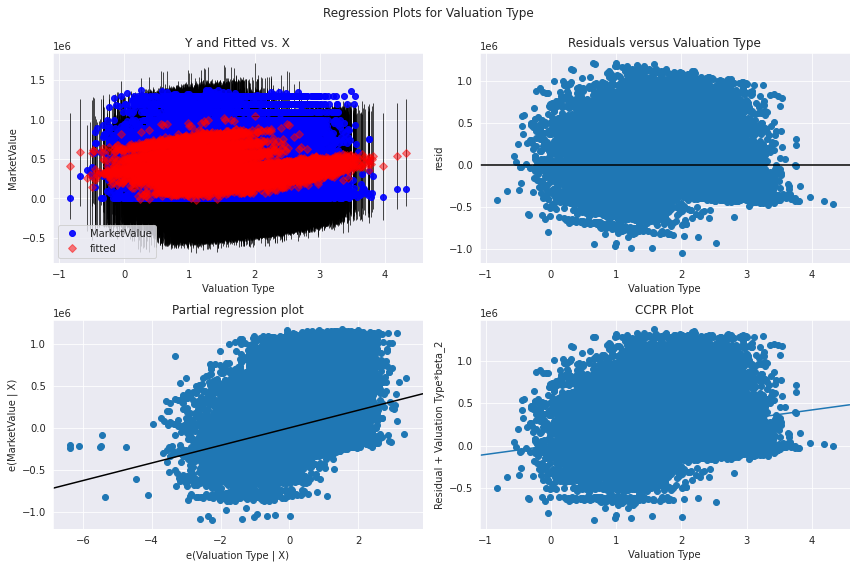

In [69]:
# MarketValue vs Valuation_type residual plots
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result, 'Valuation Type', fig=fig)

The partial regressing plot shows a random pattern. This tells us the residual supports a linear regression and was fitted well with out data.

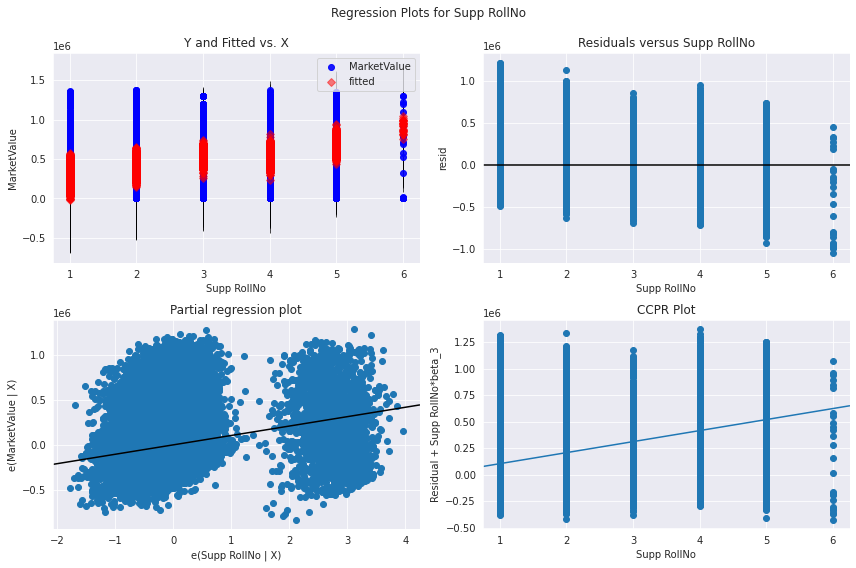

In [70]:
#Supp RollNo vs MarketValue

fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result, 'Supp RollNo', fig=fig)

In the partial plot, we see the random pattern indicating a decent fit to the data

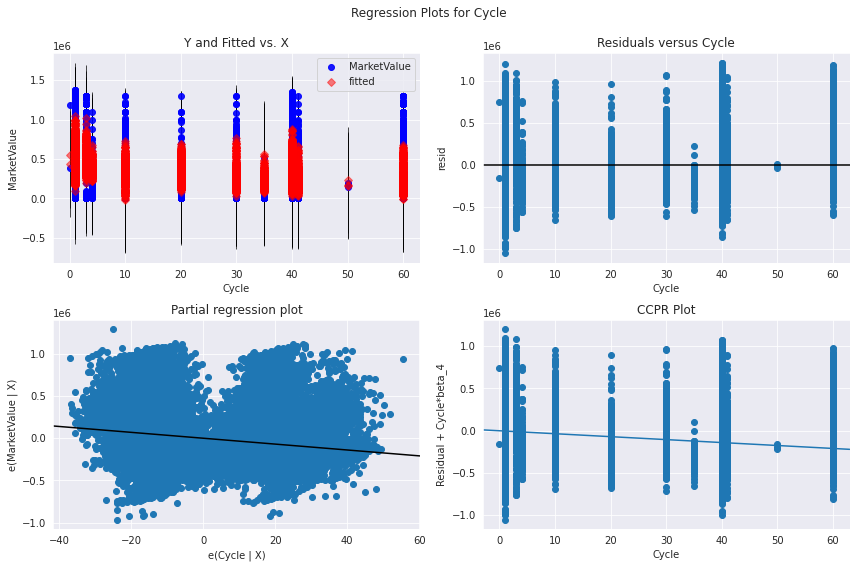

In [71]:
# Cycle vs MarketValue
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result, 'Cycle', fig=fig)

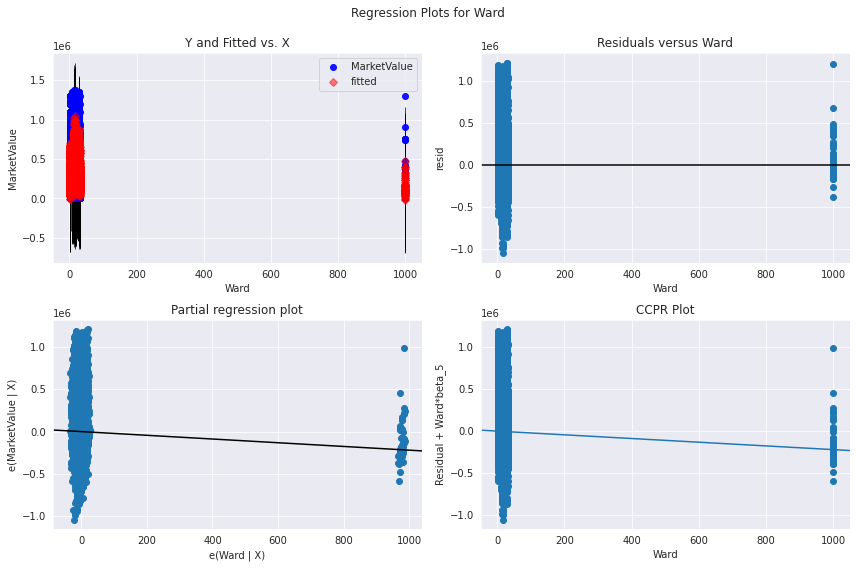

In [72]:
#Ward vs MarketValue
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result, 'Ward', fig=fig)

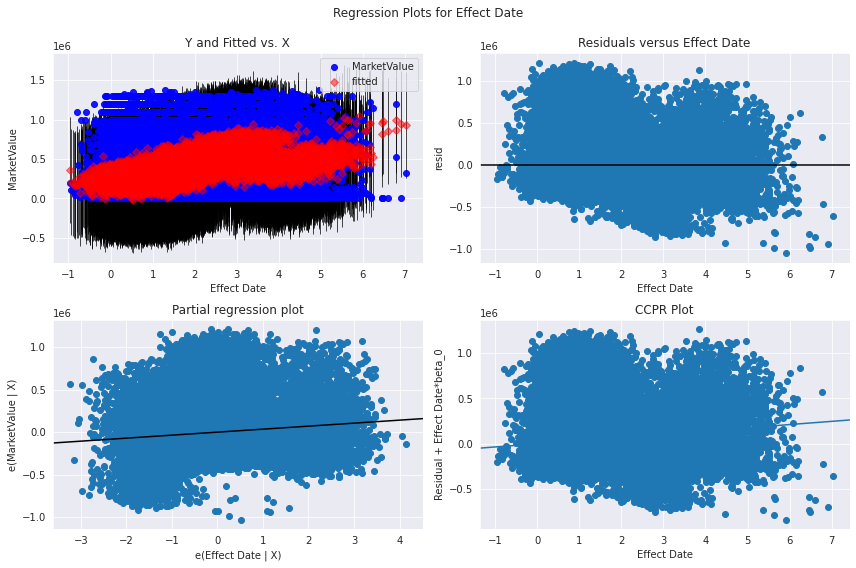

In [73]:
#Effect Date vs MarketValue
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result, 'Effect Date', fig=fig)

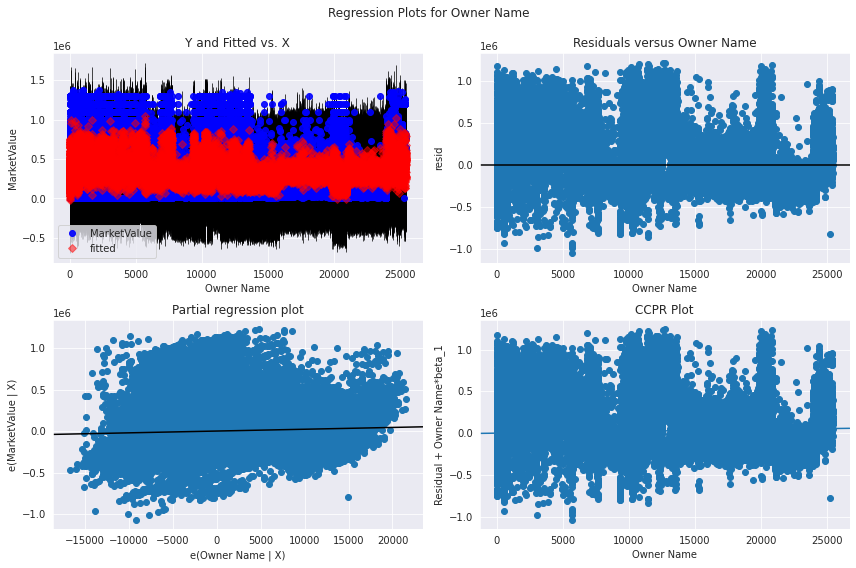

In [74]:
#Owner Name vs MarketValue
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result, 'Owner Name', fig=fig)

The plot is not randomly plotted. This means linar regresion was not a good fit for the data.

## <b> Model Using test data

In [75]:
model = sm.OLS(y_test, X_test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                              1942.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):                        0.00
Time:                        21:29:16   Log-Likelihood:                     -2.0747e+05
No. Observations:               14790   AIC:                                  4.150e+05
Df Residuals:                   14776   BIC:                                  4.151e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Township         182.8379     28.770      6.355      0.000     126.446     239.230
Owner Name         4.6331      0.463     10.015      0.000       3.726       5.540
Prop Category  -6.818e+04   2397.406    -28.439      0.000   -7.29e+04   -6.35e+04
Physical Addr   -411.4648     13.979    -29.435      0.000    -438.865    -384.064
Size              -0.0120      0.005     -2.500      0.012      -0.021      -0.003
Supp RollNo     3.417e+04   3403.110     10.042      0.000    2.75e+04    4.08e+04
Effect Date    -5172.6916   2793.759     -1.852      0.064   -1.06e+04     303.425
Zone Code       1.925e+04   1162.824     16.553      0.000     1.7e+04    2.15e+04
Usage Code      1083.7388    640.744      1.691      0.091    -172.199    2339.676
Valuation Type  6195.2378   4664.549      1.328      0.184   -2947.859    1.53e+04
Ward            -150.4048     59.430     -2.531      0.011    -266.896     -33.914
Cycle           -491.4846    183.836     -2.673      0.008    -851.826    -131.143
Meter Book     -1059.6710     89.591    -11.828      0.000   -1235.280    -884.062
Val Cnt         6.284e+05   1.55e+04     40.567      0.000    5.98e+05    6.59e+05
==============================================================================
Omnibus:                     1803.985   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2945.769
Skew:                           0.851   Prob(JB):                         0.00
Kurtosis:                       4.371   Cond. No.                     3.37e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using the test data, the model performed well with the R-square value of $0.648$

In [76]:
#Fitting on testing but using chosen variables from training data
model = sm.OLS(y_test, X_test[remaining_var])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.518
Model:                            OLS   Adj. R-squared (uncentered):              0.518
Method:                 Least Squares   F-statistic:                              2647.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):                        0.00
Time:                        21:29:16   Log-Likelihood:                     -2.0979e+05
No. Observations:               14790   AIC:                                  4.196e+05
Df Residuals:                   14784   BIC:                                  4.196e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Effect Date     3.262e+04   3021.478     10.795      0.000    2.67e+04    3.85e+04
Owner Name         2.0728      0.357      5.802      0.000       1.373       2.773
Valuation Type  1.101e+05   2807.793     39.221      0.000    1.05e+05    1.16e+05
Supp RollNo     1.108e+05   3561.202     31.118      0.000    1.04e+05    1.18e+05
Cycle          -3753.2021    176.581    -21.255      0.000   -4099.324   -3407.080
Ward            -318.4830     67.666     -4.707      0.000    -451.116    -185.850
==============================================================================
Omnibus:                     1677.512   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2306.175
Skew:                           0.956   Prob(JB):                         0.00
Kurtosis:                       3.293   Cond. No.                     1.92e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model retains the same R-squared value on test data, thus this shows us that the trained model is not overfitting on the trained dataset.

## <b> Model with Bootstrapped Coefficients:

In [77]:
## features selected by vif 
X_train_vif = X_train
y_train_vif = y_train
bootstrap_data = X_train_vif
bootstrap_data['y'] = list(y_train_vif.values)
bootstrap_data

,Effect Date,Owner Name,Valuation Type,Supp RollNo,Cycle,Ward,y
6673,1.340414,3154.636544,2.216728,1.0,1.0,15.0,680000.0
12858,3.864028,7658.884048,-0.130776,2.0,1.0,17.0,283000.0
43015,1.532401,20851.266254,2.264409,1.0,60.0,1.0,630000.0
32813,0.390228,14763.121258,1.509497,1.0,41.0,33.0,130000.0
17331,0.496931,13.146997,1.655994,1.0,30.0,18.0,25000.0
...,...,...,...,...,...,...,...
13962,0.508342,6192.187629,1.793348,1.0,30.0,18.0,42000.0
57129,5.256029,25384.248803,0.815559,2.0,3.0,14.0,589000.0
48539,0.919669,599.540268,2.602750,1.0,20.0,28.0,58000.0
1725,0.819424,731.991579,1.944257,1.0,1.0,17.0,1100000.0


In [78]:
def r_square_value(y_true, y_predicted):
    return r2_score(y_true, y_predicted)

In [79]:
bootstrap_data = bootstrap_data.rename(columns={'Owner Name': 'Owner_Name', 'Effect Date': 'Effect_Date','Valuation Type':'Valuation_Type', 'Supp RollNo':'Supp_RollNo'})

In [80]:
owner_name_coeff = []
val_type_coeff = []
eff_dt_coeff = []
supp_rollno_coeff = []
cycle_coeff = []
ward_coeff = []

iterations = 1000
np.random.seed(28)
for _ in range(iterations):
    # sampling data points with replacement
    sample_data = bootstrap_data.sample(n=10000, replace=True)
    # fit model without constant
    model = form.ols(formula = 'y ~ Owner_Name+Valuation_Type +Effect_Date+ Supp_RollNo+Cycle +Ward - 1 ', data=sample_data)
    results = model.fit()
    # append coefficients
    owner_name_coeff.append(results.params[0])
    val_type_coeff.append(results.params[1])
    eff_dt_coeff.append(results.params[2])
    supp_rollno_coeff.append(results.params[3])
    cycle_coeff.append(results.params[4])
    ward_coeff.append(results.params[5])


In [81]:
# getting the coefficients of the selected features using the average of their bootstratted values
owner_name_coeff = np.mean(np.array(owner_name_coeff))
val_type_coeff = np.mean(np.array(val_type_coeff))
eff_dt_coeff = np.mean(np.array(eff_dt_coeff ))
supp_rollno_coeff = np.mean(np.array(supp_rollno_coeff))
cycle_coeff  = np.mean(np.array(cycle_coeff))
ward_coeff = np.mean(np.array(ward_coeff))
print("owner_name_coeff is ", owner_name_coeff )
print("val_type_coeff ", val_type_coeff)
print("effect_date_coeff is ",eff_dt_coeff)
print("supp_rollno_coeff  is", supp_rollno_coeff )
print("ward_coeff is ", ward_coeff)
print("cycle_coeff is ", cycle_coeff)

owner_name_coeff is  2.166661054408004
val_type_coeff  104711.3569230203
effect_date_coeff is  35257.65719110879
supp_rollno_coeff  is 104305.4078128348
ward_coeff is  -226.39678270843152
cycle_coeff is  -3477.316637341043


In [82]:
def predict_y_value(coefficients, features):
    return np.dot(coefficients.T, features)[0]

In [83]:
coefficients_list =np.array([owner_name_coeff,val_type_coeff ,eff_dt_coeff ,supp_rollno_coeff ,cycle_coeff ,ward_coeff] )[..., None].astype(float)
y_predicted_list_train  = []
for i in range(0, len(X_train_vif)):
    x_values = np.array(list(X_train_vif.iloc[i, 0:6]))[..., None]
    y_predicted = predict_y_value(coefficients_list, x_values)[0]
    y_predicted_list_train.append(y_predicted)

In [84]:
y_true_list_train = list(bootstrap_data['y'])
r_squared_train = r_square_value(y_true_list_train, y_predicted_list_train)
print("R-sdquare for train set :" ,r_squared_train )

R-sdquare for train set : -14413610.344565455


In [85]:
X_test = X_test[remaining_var]
X_test

,Effect Date,Owner Name,Valuation Type,Supp RollNo,Cycle,Ward
33203,0.570075,15021.393886,1.875455,1.0,41.0,21.0
1704,5.535462,716.961395,1.851095,3.0,1.0,17.0
25878,1.601556,5414.493618,2.591346,1.0,40.0,15.0
22432,1.636535,9572.303667,1.298674,1.0,40.0,17.0
34352,1.677951,15538.845599,2.012161,1.0,41.0,32.0
...,...,...,...,...,...,...
37889,0.766920,17398.944401,1.541312,1.0,10.0,20.0
3929,1.997782,2005.827474,1.372642,4.0,1.0,16.0
39348,1.328683,18404.867928,2.013374,1.0,10.0,20.0
40050,0.824968,6152.855164,2.256426,1.0,10.0,19.0


In [86]:
y_predicted_list_test = []
for i in range(0, len(X_test)):
    x_values = np.array(list(X_test.iloc[i, 0:6]))[..., None]
    y_predicted = predict_y_value(coefficients_list, x_values)[0]
    y_predicted_list_test.append(y_predicted)

In [87]:
r_squared_test = r_square_value(list(y_test), y_predicted_list_test)
print("R-squared for test set :" ,r_squared_test )

R-squared for test set : -13660233.455620242


# Conclusion

Based on our final model MarketValue =  1.121e+05(Supp RollNo) + 1.088e+05(Valuation Type) - 3720.9505(Cycle) +  3.18e+04(Effect Date) +  2.1290(Owner Name) - 293.6793(Ward), this clearly shows that not all weights are zero, thus leading to us rejecting our null hypothesis that where $B_{i}\  $ = 0 for all i.Based on our results, Supp Rollno, Valuation Type , Cycle, Effect Date, Owner Name and ward are the only determinants of the Market Value. According to the test results of our linear regression model the effect date has a greatest positive influence on the Market Value, this is shown by the large coefficient value for this variable. Cycle has the greatest negative influence on the negative influence on the Market Value.